In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd

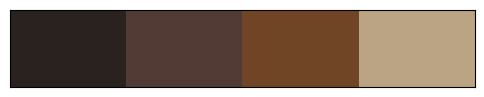

In [3]:
# Normalize the RGB colors (RGB color tuples in comments):
colors = [(42/255, 34/255, 31/255),    # (42, 34, 31)
          (82/255, 59/255, 53/255),    # (82, 59, 53)
          (112/255, 69/255, 37/255),   # (112, 69, 37)
          (187/255, 164/255, 132/255)  # (187, 164, 132)
         ]

# Create a ListedColormap (discrete colors):
custom_cmap_discrete = ListedColormap(colors)

# Display a colorbar with the custom colormap:
fig, ax = plt.subplots(figsize=(6, 1))
plt.imshow([[i for i in range(len(colors))]], 
           cmap=custom_cmap_discrete, 
           aspect='auto')
plt.xticks([]), plt.yticks([]);  # Turn off tickmarks
# plt.show()

In [4]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

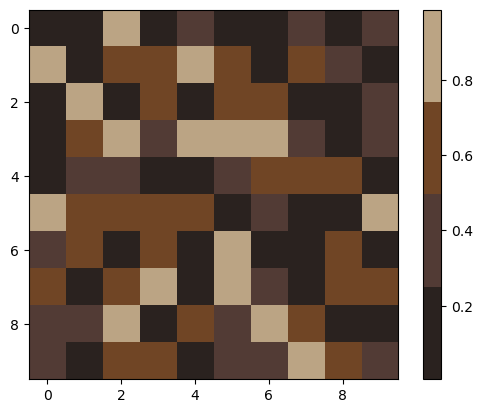

In [5]:
# Create randomized data with NumPy:
data = np.random.rand(10, 10)

# Plot using the custom colormap:
plt.imshow(data, cmap=custom_cmap_discrete)
plt.colorbar();
# plt.show()

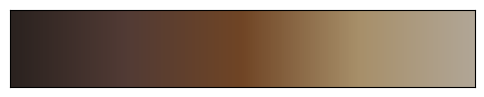

In [6]:
# Normalize RGB colors (RGB color tuples in comments):
colors = [(42/255, 34/255, 31/255),     # (42, 34, 31)
          (82/255, 59/255, 53/255),     # (82, 59, 53)
          (112/255, 69/255, 37/255),    # (112, 69, 37)
          (167/255, 143/255, 105/255),  # (187, 164, 132)
          (177/255, 166/255, 150/255)   # (177, 166, 150)
         ]

# Create a list of positions for each color in the colormap:
positions = [0.0, 0.25, 0.5, 0.75, 1.0]

# Create a LinearSegmentedColormap (continuous colors):
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', 
                                                list(zip(positions, colors)))

# Display a colorbar with the custom colormap:
fig, ax = plt.subplots(figsize=(6, 1))
plt.imshow([[i for i in range(256)]], 
           cmap=custom_cmap, 
           aspect='auto', 
           vmin=0, 
           vmax=255)
plt.xticks([]), plt.yticks([]);
# plt.show()

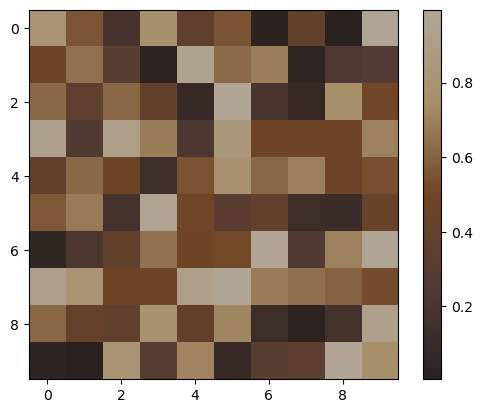

In [7]:
# Create randomized data:
data = np.random.rand(10, 10)

# Plot using the custom colormap:
plt.imshow(data, cmap=custom_cmap)
plt.colorbar();
# plt.show()

In [8]:
# Load the CSV file into a pandas DataFrame:
df = pd.read_csv('data/NYC_4_oaks_2022.csv')
#df = pd.read_csv('https://bit.ly/3t3Vbx7')

# Create a GeoDataFrame with Point geometries:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df['longitude'], 
                                                   df['latitude']), 
                       crs='EPSG:4326')

gdf.head(3)

,latin,common,latitude,longitude,geometry
0,Quercus palustris,pin oak,40.794111,-73.818679,POINT (-73.81868 40.79411)
1,Quercus palustris,pin oak,40.740687,-73.808260,POINT (-73.80826 40.74069)
2,Quercus palustris,pin oak,40.532113,-74.156181,POINT (-74.15618 40.53211)


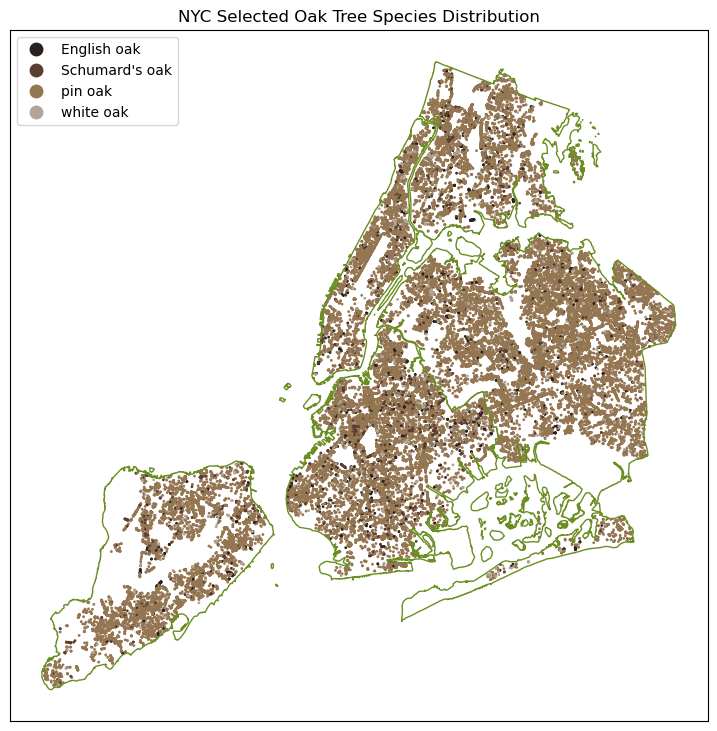

In [9]:
# Plot tree locations along with NYC borough boundaries:
path_to_data = gpd.datasets.get_path("nybb")
gdf_nyc = gpd.read_file(path_to_data)

# Extract the boundaries GeoSeries:
borough_boundaries = gdf_nyc.boundary

# Plot the boundaries with no fill:
ax = borough_boundaries.plot(figsize=(9, 9), 
                             linewidth=1, 
                             edgecolor='olivedrab')

# Convert the tree gdf crs to the boroughs crs:
gdf = gdf.to_crs(gdf_nyc.crs)

# Plot the tree locations in the same figure:
gdf.plot(column='common', 
         ax=ax, 
         legend=True, 
         markersize=1, 
         cmap=custom_cmap)

# Customize the plot:
plt.title('NYC Selected Oak Tree Species Distribution')
plt.xticks([]), plt.yticks([]);

# Show the plot
# plt.show()